In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

import argparse
import shlex
import sys

from target_toolbox.aruco_marker import ARUCO_INNER_BIT, ARUCO_AMOUNT, ARUCO_EDGE_BIT, ARUCO_DICT_TYPE_STR, ARUCO_DICT_TYPE
from target_toolbox.aruco_marker import draw_aruco_marker, draw_aruco_desc_tile

In [2]:
def get_parser():
    ### compose parser
    parser = argparse.ArgumentParser(formatter_class=argparse.ArgumentDefaultsHelpFormatter)
    parser.add_argument('-i', '--index', type=int, choices=range(0,ARUCO_AMOUNT), 
                        metavar='[0, {})'.format(ARUCO_AMOUNT), 
                        help='ArUco marker index.')
    parser.add_argument('-l', '--length', type=int, 
                        help='ArUco marker side length in mm (including edge).')
    parser.add_argument('--dpi', type=int, default=600,
                        help='ArUco marker dpi.')
    parser.add_argument('-v', '--verbose', type=int, default=1, 
                        help='Verbosity of logging: 0-critical, 1-error, 2-warning, 3-info, 4-debug')
    return parser

# def set_verbose(args):
#     ### set logging
#     vTable = {0: logging.CRITICAL, 1: logging.ERROR, 2: logging.WARNING, 3: logging.INFO, 4: logging.DEBUG}
#     logging.basicConfig(format='%(levelname)s: %(message)s', level=vTable[args.verbose], stream=sys.stdout)
#     return

In [3]:
arg_str = '-i 20 -l 140'
parser = get_parser()
args, _ = parser.parse_known_args(shlex.split(arg_str))

# make gap tile
aruco_marker = draw_aruco_marker(ARUCO_DICT_TYPE, args.index, args.length, args.dpi)
side_pixels = aruco_marker.shape[1]
gap_canvas = np.full((np.round(side_pixels/(ARUCO_INNER_BIT+2*ARUCO_EDGE_BIT)).astype(int), side_pixels, 3), 
                     255, np.uint8)
text_canvas = draw_aruco_desc_tile(ARUCO_DICT_TYPE_STR, args.index, args.length, args.dpi)

# concatenate final pattern
full_pattern = np.concatenate([aruco_marker, gap_canvas, text_canvas], axis=0)

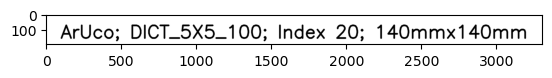

In [4]:
plt.imshow(text_canvas)

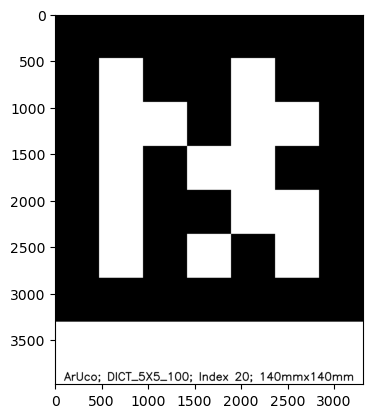

In [5]:
plt.imshow(full_pattern)

In [1]:
for efl in (5, 12, 25):
    for dist in (5, 10, 20):
        print(efl, dist, 42/efl*dist)

5 5 42.0
5 10 84.0
5 20 168.0
12 5 17.5
12 10 35.0
12 20 70.0
25 5 8.4
25 10 16.8
25 20 33.6
